In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("CreditScoring.csv")
df.head(5)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


# 6.2 Data Cleaning and preparation

* Downloading data
* Re-encoding categorical values
* Doing the train/validation/test split

In [3]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)
df.head(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
home_values = {
    1: "rent",
    2: "owner",
    3: "private",
    4: "ignore",
    5: "parents",
    6: "others",
    0: "unk"
}

marital_values = {
    1: "single",
    2: "married",
    3: "widow",
    4: "separated",
    5: "divorced",
    0: "unk"
}

record_values = {
    1: "no",
    2: "yes",
    0: "unk"
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.home = df.home.map(home_values)
df.marital  = df.marital.map(marital_values)
df.records = df.records.map(record_values)
df.job = df.job.map(job_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [6]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [7]:
df.income.replace(to_replace=99999999, value=np.nan).max()

np.float64(959.0)

In [8]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [9]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [10]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.26, random_state=11)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
y_train = (df_train.status == "default").astype('int').values
y_val = (df_val.status == "default").astype('int').values
y_test = (df_test.status == "default").astype('int').values

In [13]:
del df_train['status']
del df_val['status']
del df_test['status']

# 6.3 Decision Tree

* How a decision tree looks like
* Training a decision tree
* Overfitting
* Controlling the size of a tree

In [14]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'partime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [15]:
xi = df_train.iloc[0].to_dict()
assess_risk(xi)

'ok'

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [17]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [18]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [19]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=others', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [20]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [22]:
y_pred = dt.predict_proba(X_val)

In [23]:
y_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], shape=(927, 2))

In [24]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_pred)
print("Train auc: ", auc_train)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("Val auc: ", auc)


Train auc:  1.0
Val auc:  0.657593811828618


In [25]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_pred)
print("Train auc: ", auc_train)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("Val auc: ", auc)


Train auc:  0.7728289328355236
Val auc:  0.7413062675355742


In [27]:
from sklearn.tree import export_text

In [28]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 3750.00
|   |   |   |--- class: 1
|   |   |--- assets >  3750.00
|   |   |   |--- class: 0



# 6.5 Decision trees parameter tuning

* selecting max_depth
* selecting min_sampled_leaf

In [29]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print("%4s -> %.3f" % (d, auc))

   1 -> 0.605
   2 -> 0.672
   3 -> 0.741
   4 -> 0.758
   5 -> 0.763
   6 -> 0.755
  10 -> 0.671
  15 -> 0.658
  20 -> 0.651
None -> 0.649


In [30]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))


In [31]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores.head(5)

,max_depth,min_samples_leaf,auc
0,4.0,1,0.758400
1,4.0,2,0.758400
2,4.0,5,0.758400
3,4.0,10,0.760672
4,4.0,15,0.762981


In [32]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
41,10.0,20,0.794525
68,NaN,20,0.792368
59,20.0,20,0.791912
23,6.0,20,0.791074
50,15.0,20,0.790962


In [33]:
df_scores_pivot  = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.660  0.758  0.763  0.759  0.734  0.668  0.645  0.647
2                 0.678  0.758  0.763  0.759  0.741  0.683  0.682  0.678
5                 0.710  0.758  0.764  0.758  0.756  0.710  0.712  0.715
10                0.765  0.761  0.763  0.774  0.774  0.769  0.762  0.768
15                0.778  0.763  0.770  0.782  0.783  0.781  0.778  0.782
20                0.792  0.765  0.778  0.791  0.790  0.795  0.791  0.792
100               0.781  0.759  0.766  0.778  0.781  0.781  0.781  0.781
200               0.767  0.751  0.763  0.767  0.767  0.767  0.767  0.767
500               0.682  0.682  0.682  0.682  0.682  0.682  0.682  0.682

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

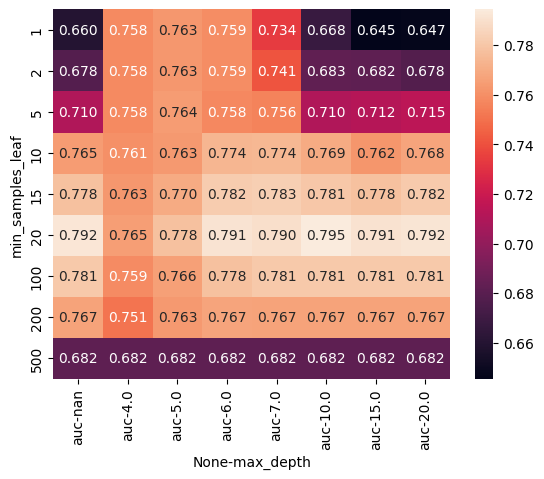

In [34]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [35]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# 6.6 Ensembles and random forest

* Board of experts
* Ensembling models
* Random forest - ensembling decision trees
* Tuning random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7919903645163814

In [39]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [40]:
df_scores = pd.DataFrame(scores, columns=["n_estimators", "auc"])
df_scores.head(10)

,n_estimators,auc
0,10,0.791990
1,20,0.804395
2,30,0.808662
3,40,0.816484
4,50,0.818292
5,60,0.821020
6,70,0.821098
7,80,0.822733
8,90,0.824002
9,100,0.822241


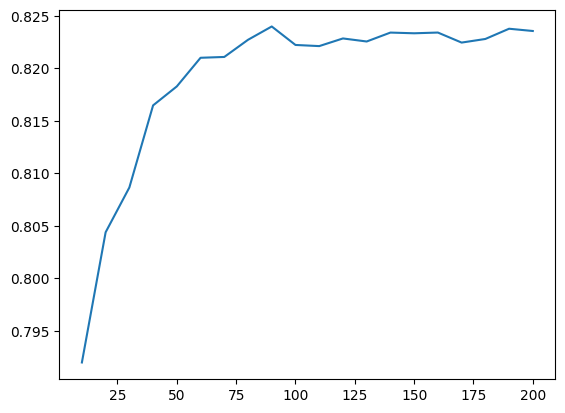

In [41]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [42]:
scores = []

for d  in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [43]:
df_scores = pd.DataFrame(scores, columns=["max_depth", "n_estimators", "auc"])
df_scores.head(10)

,max_depth,n_estimators,auc
0,5,10,0.793972
1,5,20,0.804862
2,5,30,0.806262
3,5,40,0.808112
4,5,50,0.809104
5,5,60,0.809462
6,5,70,0.812144
7,5,80,0.813419
8,5,90,0.813363
9,5,100,0.812944


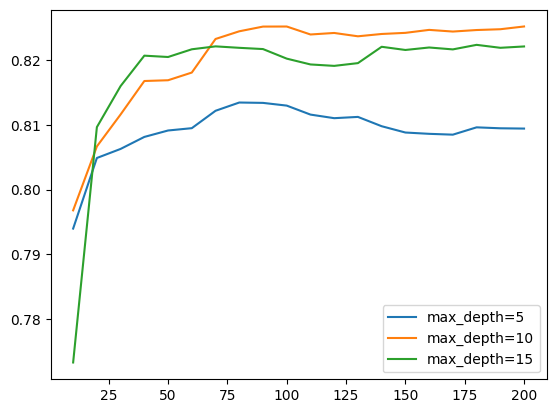

In [44]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"max_depth={d}")

plt.legend()

In [45]:
max_depth = 10

In [46]:
scores = []

for s  in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [47]:
df_scores = pd.DataFrame(scores, columns=["min_samples_leaf", "n_estimators", "auc"])
df_scores.head(10)

,min_samples_leaf,n_estimators,auc
0,1,10,0.796786
1,1,20,0.806648
2,1,30,0.811580
3,1,40,0.816739
4,1,50,0.816856
5,1,60,0.818041
6,1,70,0.823222
7,1,80,0.824407
8,1,90,0.825133
9,1,100,0.825144


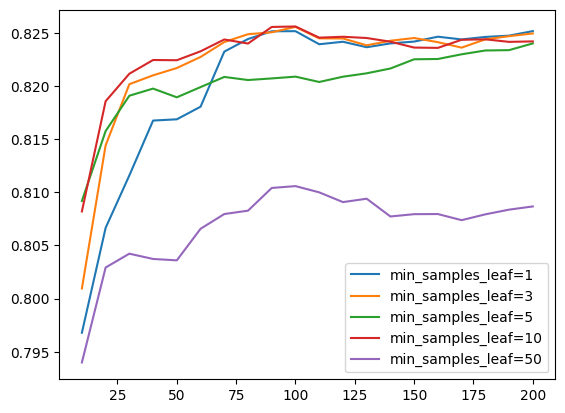

In [48]:
for s  in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"min_samples_leaf={s}")

plt.legend()

In [49]:
min_samples_leaf = 3


rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=10,
                                    min_samples_leaf=3,
                                    random_state=1)

# 6.7 Gradient boosting and XGBoost

* Gradient boosting vs random forest
* Installing XGBoost
* Training the first model
* Performance monitor
* Parsing xgboost's monitoring output

In [50]:
import xgboost as xgb

In [51]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [52]:
%%capture output

xgb_params={
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}

watchlist = [(dtrain, 'train'), (dval, 'val')]

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [53]:
s = output.stdout
print(s)

[0]	train-auc:0.86552	val-auc:0.77783
[5]	train-auc:0.93247	val-auc:0.81053
[10]	train-auc:0.95517	val-auc:0.80948
[15]	train-auc:0.97076	val-auc:0.81516
[20]	train-auc:0.98076	val-auc:0.81790
[25]	train-auc:0.98632	val-auc:0.81893
[30]	train-auc:0.99042	val-auc:0.81920
[35]	train-auc:0.99426	val-auc:0.81828
[40]	train-auc:0.99565	val-auc:0.81731
[45]	train-auc:0.99679	val-auc:0.81423
[50]	train-auc:0.99797	val-auc:0.81317
[55]	train-auc:0.99893	val-auc:0.81079
[60]	train-auc:0.99932	val-auc:0.81007
[65]	train-auc:0.99942	val-auc:0.80838
[70]	train-auc:0.99958	val-auc:0.80819
[75]	train-auc:0.99989	val-auc:0.80887
[80]	train-auc:0.99997	val-auc:0.80837
[85]	train-auc:0.99998	val-auc:0.80837
[90]	train-auc:0.99999	val-auc:0.80763
[95]	train-auc:1.00000	val-auc:0.80567
[100]	train-auc:1.00000	val-auc:0.80566
[105]	train-auc:1.00000	val-auc:0.80471
[110]	train-auc:1.00000	val-auc:0.80450
[115]	train-auc:1.00000	val-auc:0.80529
[120]	train-auc:1.00000	val-auc:0.80438
[125]	train-auc:1.0000

In [54]:
y_pred = model.predict(dval)

In [55]:
roc_auc_score(y_val, y_pred)

0.8041017873710331

In [56]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [57]:
df_score = parse_xgb_output(output)

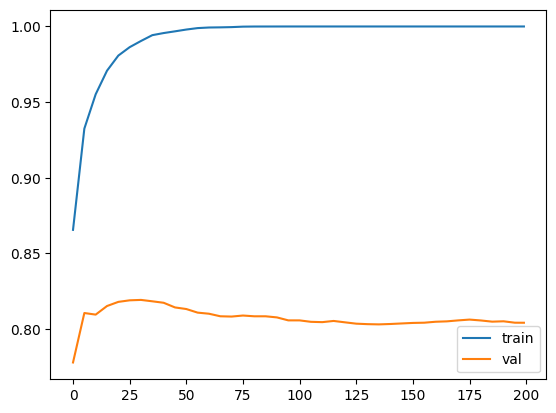

In [58]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

# 6.8 XGBOOST Tuning

Tunign the following:

* eta
* max_depth
* min_child_weight

In [59]:
scores = {}

In [60]:
%%capture output

xgb_params={
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}

watchlist = [(dtrain, 'train'), (dval, 'val')]

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [61]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [62]:
scores.keys()

dict_keys(['eta=0.3'])

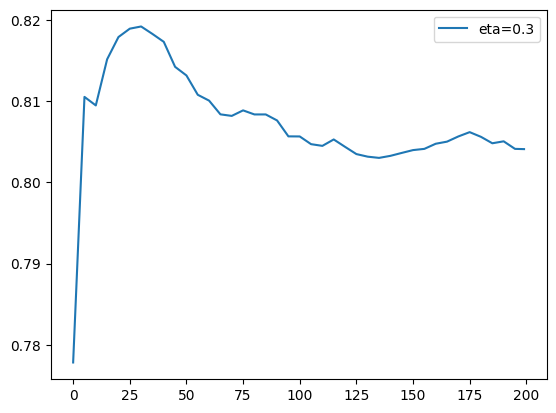

In [64]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)

plt.legend()

In [65]:
scores = {}

In [66]:
%%capture output

xgb_params={
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}

watchlist = [(dtrain, 'train'), (dval, 'val')]

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [67]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

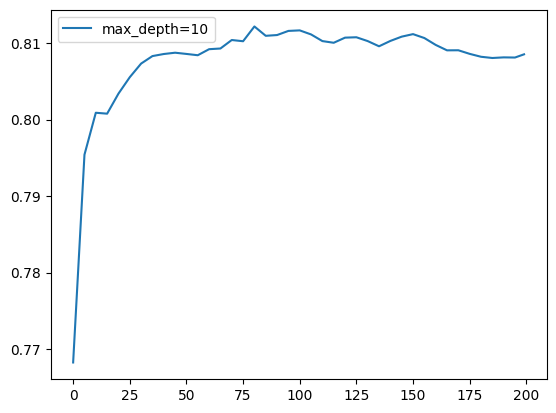

In [68]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)

plt.legend()

In [69]:
scores = {}

In [70]:
%%capture output

xgb_params={
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}

watchlist = [(dtrain, 'train'), (dval, 'val')]

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [71]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

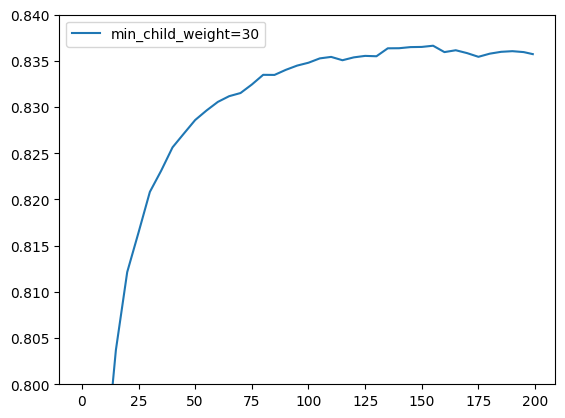

In [72]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)

plt.ylim([0.8, 0.84])
plt.legend()

In [73]:
xgb_params={
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}

watchlist = [(dtrain, 'train'), (dval, 'val')]

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

# 6.9 Selecting the final model

* Choosing between xgboost, random forest and decision tree
* Training the final model
* Saving the model

In [74]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [75]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7909619834341222

In [76]:
rf = RandomForestClassifier(n_estimators=200, 
                                    max_depth=10,
                                    min_samples_leaf=3,
                                    random_state=1)

rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8249320933144052

In [78]:
xgb_params={
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [79]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8356294921809504

In [80]:
df_full_train = df_full_train.reset_index(drop=True)

In [81]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [82]:
y_full_train

array([0, 1, 0, ..., 0, 0, 1], shape=(3563,))

In [83]:
del df_full_train['status']

In [86]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)


In [87]:
features = dv.get_feature_names_out().tolist()

dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, feature_names=features)

In [88]:
y_pred = model.predict(dtest)

In [90]:
roc_auc_score(y_test, y_pred)

0.8207382337129172